# ePPR - extended Projection Pursuit Regression
# $$\hat{y}_i=\bar{y}+\sum_{d=0}^D\sum_{m=1}^{M_d}\beta_{m,d}\phi_{m,d}(\alpha_{m,d}^Tx_{i-d})$$
# where     $\frac{1}{n}\sum_{i=1}^n\phi_{m,d}(\alpha_{m,d}^Tx_{i-d})=0$,    $\frac{1}{n}\sum_{i=1}^n\phi_{m,d}^2(\alpha_{m,d}^Tx_{i-d})=1$
# by minimizing    $f=\sum_{i=1}^n(y_i-\hat{y}(x_i))^2+\lambda\sum_{d=0}^D\sum_{m=1}^{M_d}\Vert{L\alpha_{m,d}}\Vert^2$
___
### References
Rapela, J., Felsen, G., Touryan, J., Mendel, J.M., and Grzywacz, N.M. (2010). ePPR: a new strategy for the characterization of sensory cells from input/output data. Network: Computation in Neural Systems 21, 35–90.

Friedman, J.H., and Stuetzle, W. (1981). Projection Pursuit Regression. Journal of the American Statistical Association 76, 817–823.
___

# Simulated Data
#### x: Natural Images
#### y: Simulated Neuron with MFR=0.56, MIF=4.26

In [1]:
using FileIO
simdata=load(joinpath(@__DIR__,"simdata.jld2"));x=simdata["x"];y=simdata["y"];imagesize=simdata["imagesize"];

┌ Info: Precompiling JLD2 [033835bb-8acc-5ee8-8aae-3f567f8a3819]
└ @ Base loading.jl:1278


In [2]:
using Interact,Images
i = slider(1:size(x,1))
xvalue = map(j->colorview(Gray,reshape(x[j,:]/156,imagesize...)),i)
yvalue = map(j->y[j],i)
vbox(i,xvalue,yvalue)

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-3128917233749103556\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-1740182792307640688\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-3128917233749103556\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11184957092579031124\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-6457048971547998356\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11184957092579031124\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1278


(div { style=Dict("display" => "flex","flex-direction" => "column") }
  Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 24000,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 3 listeners. Value:
12000, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\fff00\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\fff00\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\fff00\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\fff00\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\fff00\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000036422570, Task (runnable) @0x0000000036422570), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\

## ePPR with Linear Time Interaction

┌ Info: Precompiling ePPR [714c76c0-9ccf-11e8-0eb6-d37ea2f30fce]
└ @ Base loading.jl:1278


Cross Validation Data Partition: n = 24000, ntrain = 21120 in 5-fold, ntrainfold = 4224 in 8-fold, ntest = 2880 in 8-fold
Choose 5th trainset.
ePPR Forward Stepwise ...
Fit (Temporal-0, Spatial-1) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 11442.023688028132, PenaltyLoss: 352.72270180688093.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.130209686061388
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11048.716482761341, PenaltyLoss: 68.2644689188791.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.614620850170869
                                 step is λ = 0
New Term 3th iteration. TermLoss: 10700.901134393123, PenaltyLoss: 71.1447100905437.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.2034046904576494
                                 step is λ = 0
New Term 4th iteration. TermLoss: 10609.464154724543, PenaltyLoss: 87.58394343949661.

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.34215896775097754
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 3.1995927303341245e-5.
Fit (Temporal-2, Spatial-3) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 7787.717432260224, PenaltyLoss: 466.33876429634313.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9603931288010489
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7800.542879175668, PenaltyLoss: 0.6864424457663073.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.15650500203234724
                                 step is λ = 0
NewtonTrustRegion 2th iteration, r = 0.25
                                 ρ = 0.15650500203234724
                                 step is λ = 0
NewtonTrustRegion 3th iteration, r = 0.0625
                                 ρ = 0.8586345481860644
    

NewtonTrustRegion 4th iteration, r = 0.015625
                                 ρ = 0.761879525823203
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 2.6773328501594504e-5.
Refit (Temporal-2, Spatial-3) New Term ...
New Term 1th iteration. TermLoss: 7650.150106280634, PenaltyLoss: 6.184115277337046.
NewtonTrustRegion 1th iteration, r = 0.25
                                 ρ = 0.7676556019470394
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7642.836872659252, PenaltyLoss: 7.428767205714191.
NewtonTrustRegion 1th iteration, r = 0.25
                                 ρ = 0.3897348621171748
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00014864812160983763.
ePPR Backward Stepwise ...


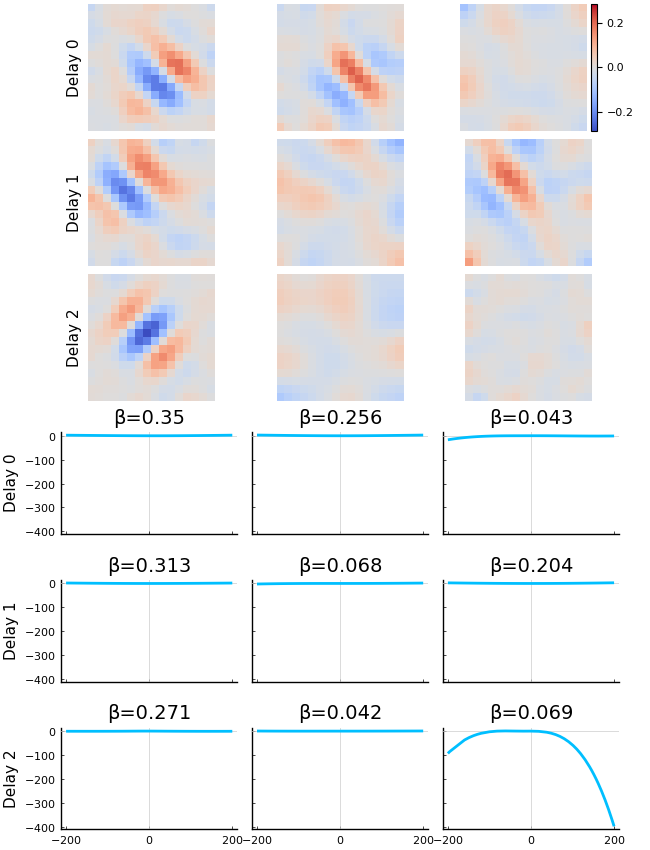

Drop Term: (temporal-2, spatial-2) with β: 0.0415502766845926.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.3499635545861382, 0.25633033007997974, 0.04308068652331133, 0.3127998902177004, 0.06756919010530002, 0.2039019962759906, 0.2709458465076148, 0.06851499884960742]
New βs: [0.3646561328266568, 0.27850595897296276, 0.055777123752518136, 0.32426522978001693, 0.06549974753762605, 0.2260075198419278, 0.28356437477703117, 0.07733607381779754]
Refit (Temporal-0, Spatial-1) New Term ...


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


New Term 1th iteration. TermLoss: 7649.120540471106, PenaltyLoss: 83.27434550482968.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9820543629202917
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7648.631930241007, PenaltyLoss: 83.68563154877363.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9845479474845323
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 6.842610610154417e-6.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 7653.449167839, PenaltyLoss: 66.95334300979387.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9468774642468272
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7653.254686063101, PenaltyLoss: 67.12416399416223.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9634729079396555
       

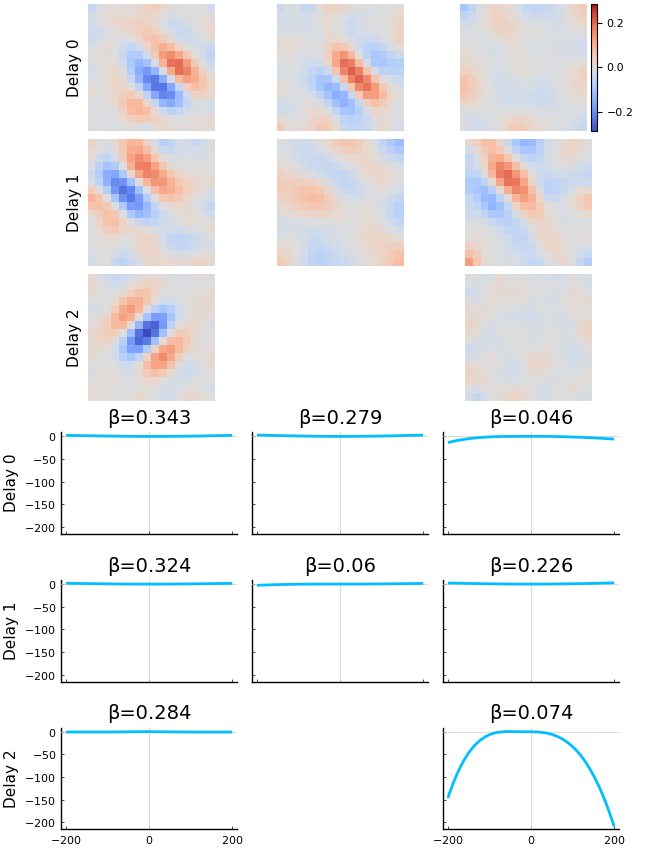

Drop Term: (temporal-0, spatial-3) with β: 0.046370452866798376.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.3426060251252612, 0.27850595897296276, 0.32426522978001693, 0.06020310524562009, 0.2260075198419278, 0.28356437477703117, 0.0743930998527205]
New βs: [0.36322982603986526, 0.2746497590941749, 0.3248479154519575, 0.06883707784555736, 0.23037893040764074, 0.2937971069055468, 0.08621754839908134]
Refit (Temporal-0, Spatial-1) New Term ...


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


New Term 1th iteration. TermLoss: 7658.424460537563, PenaltyLoss: 83.98967056654494.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.860902704416018
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7655.123654308884, PenaltyLoss: 85.89022715168964.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.7934267706634608
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 1.1365832946891179e-5.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 7658.658013150796, PenaltyLoss: 66.95334300979387.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9086209319366425
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7656.661549665544, PenaltyLoss: 67.94364402719316.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9460533209862436
    

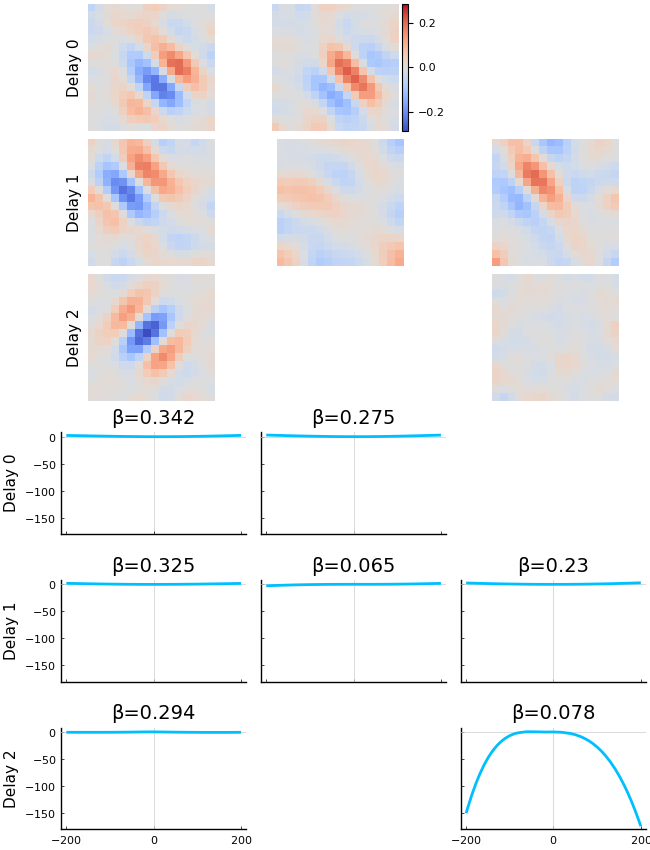

Drop Term: (temporal-1, spatial-2) with β: 0.06491661559173129.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.34171597234788414, 0.2746497590941749, 0.3248479154519575, 0.23037893040764074, 0.2937971069055468, 0.07761016268390547]
New βs: [0.3630205866295334, 0.27599406821601746, 0.33074760013738946, 0.23583413943821127, 0.2954895733908329, 0.08879956922650575]
Refit (Temporal-0, Spatial-1) New Term ...


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


New Term 1th iteration. TermLoss: 7692.680594531152, PenaltyLoss: 85.67138078956526.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9162175749760726
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7692.705499052105, PenaltyLoss: 85.94504781758428.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9502326371991013
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 3.60130395738305e-6.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 7696.5297642243295, PenaltyLoss: 66.95334300979387.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9065383717182721
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7693.962681769888, PenaltyLoss: 68.38213057829054.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9476966307523096
    

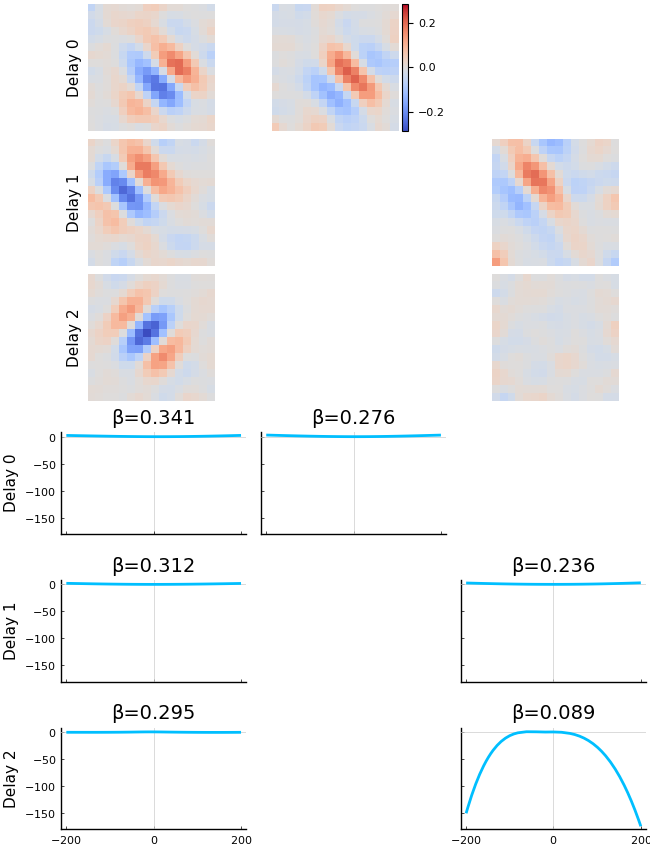

Drop Term: (temporal-2, spatial-3) with β: 0.08879956922650575.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.34075985690846244, 0.27599406821601746, 0.31180604233732384, 0.23583413943821127, 0.2954895733908329]
New βs: [0.3628624954601225, 0.27552909968117556, 0.33172160378205706, 0.23817759861156854, 0.2798788060743788]
Refit (Temporal-0, Spatial-1) New Term ...


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


New Term 1th iteration. TermLoss: 7745.122960391279, PenaltyLoss: 86.08783225633476.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9621264384917341
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7744.6890429640625, PenaltyLoss: 86.41652426711951.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9368912017797124
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 4.469415753413395e-6.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 7748.3448971223925, PenaltyLoss: 66.95334300979387.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9191098974383286
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7746.0537936637875, PenaltyLoss: 68.38843688952542.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9460322823242544
 

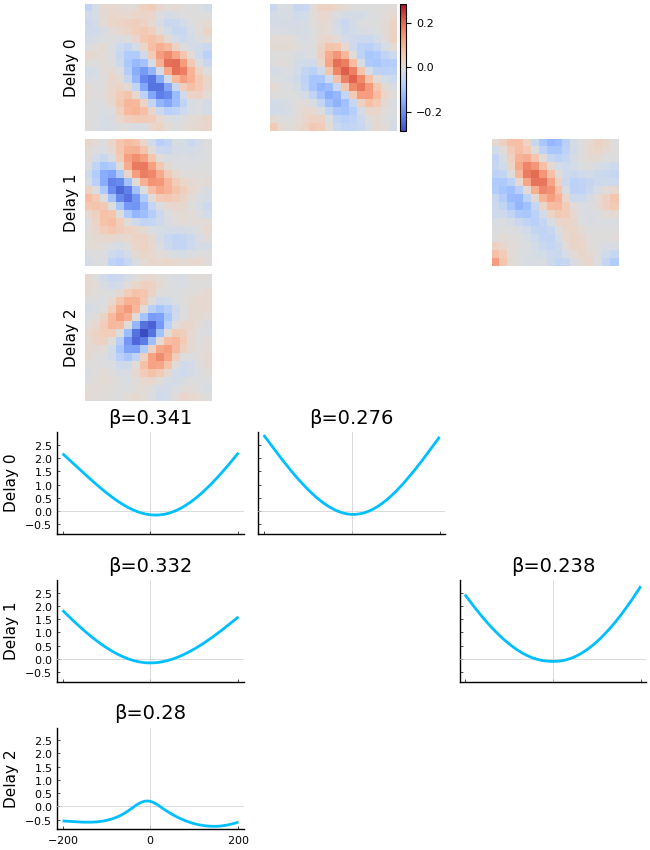

Drop Term: (temporal-1, spatial-3) with β: 0.23817759861156854.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.34065028824865495, 0.27552909968117556, 0.33172160378205706, 0.2798788060743788]
New βs: [0.363405233842817, 0.27144448517680625, 0.3735425414082877, 0.280942400890765]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 8209.342206490815, PenaltyLoss: 86.68604733254979.


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.913846364796438
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8207.127889744908, PenaltyLoss: 87.92589872635013.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9059005144499809
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 8.596454474975333e-6.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 8210.138125860947, PenaltyLoss: 66.95334300979387.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.929179521542923
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8205.143075785003, PenaltyLoss: 69.70045244257531.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9503954949878656
                                 step is λ = 0
New Term converged in 2 iterations with (los

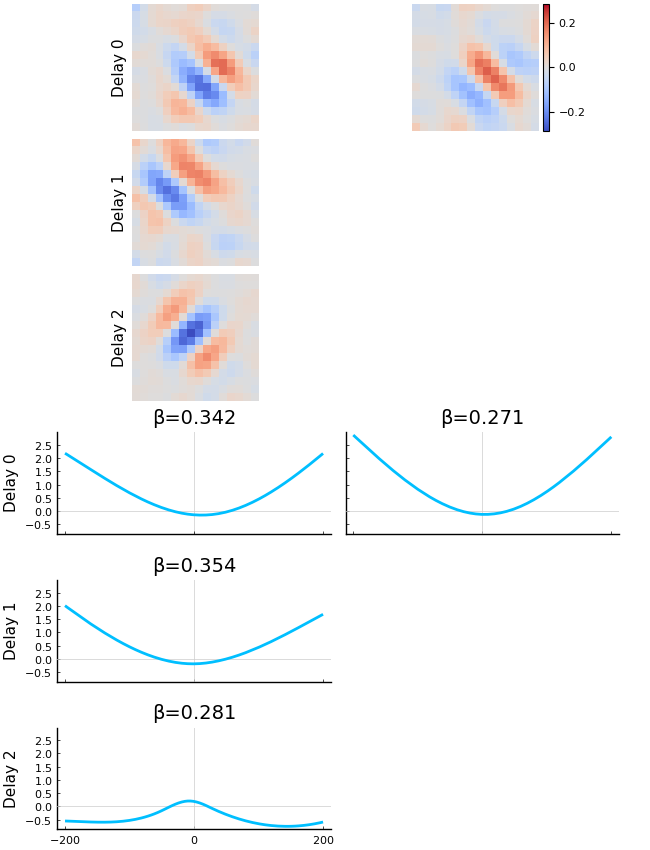

Drop Term: (temporal-0, spatial-2) with β: 0.27144448517680625.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.3415284168642254, 0.354430421441152, 0.280942400890765]
New βs: [0.4222341186256221, 0.37727799312055554, 0.2801035467957838]
Refit (Temporal-0, Spatial-1) New Term ...


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


New Term 1th iteration. TermLoss: 8776.256694931439, PenaltyLoss: 87.80608232834841.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0606386106349712
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8732.640814698678, PenaltyLoss: 95.73247407263446.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.25783666777442
                                 step is λ = 0
New Term 3th iteration. TermLoss: 8730.305056081754, PenaltyLoss: 97.00916682589366.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1990500973974036
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 7.626043396252353e-5.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 8735.24281790527, PenaltyLoss: 75.8388430454949.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0941519078249313
        

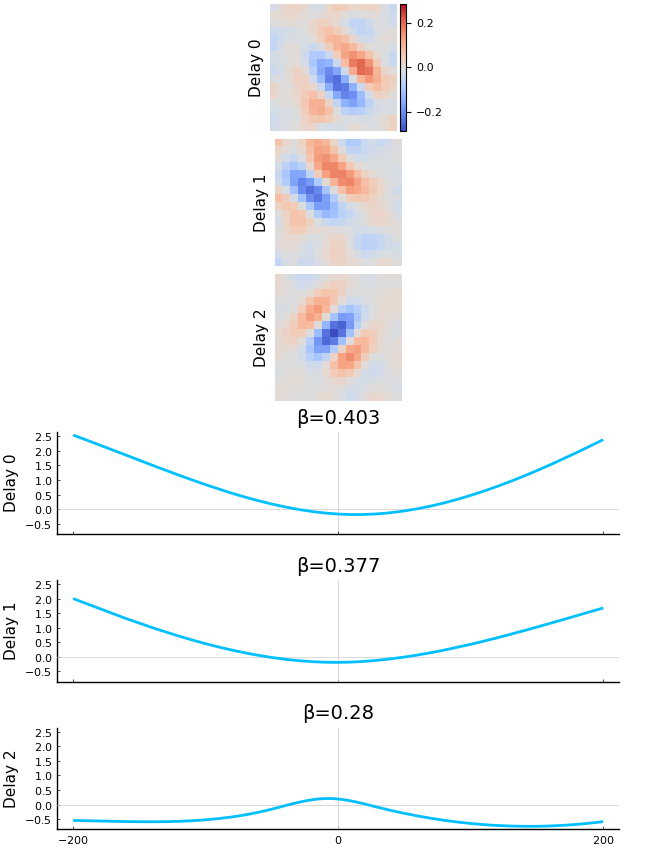

Drop Term: (temporal-2, spatial-1) with β: 0.2801035467957838.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.40274447346121844, 0.37727799312055554]
New βs: [0.4318987981974514, 0.37985945682875133]
Refit (Temporal-0, Spatial-1) New Term ...


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


New Term 1th iteration. TermLoss: 9394.41321619171, PenaltyLoss: 97.81954517254835.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0788415622759002
                                 step is λ = 0
New Term 2th iteration. TermLoss: 9388.645565276847, PenaltyLoss: 102.66420976377245.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1303454046189445
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 4.677405459659591e-5.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 9394.42197057911, PenaltyLoss: 75.8388430454949.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0083507371390725
                                 step is λ = 0
New Term 2th iteration. TermLoss: 9390.232815192745, PenaltyLoss: 79.17950112438176.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0264386039589826
      

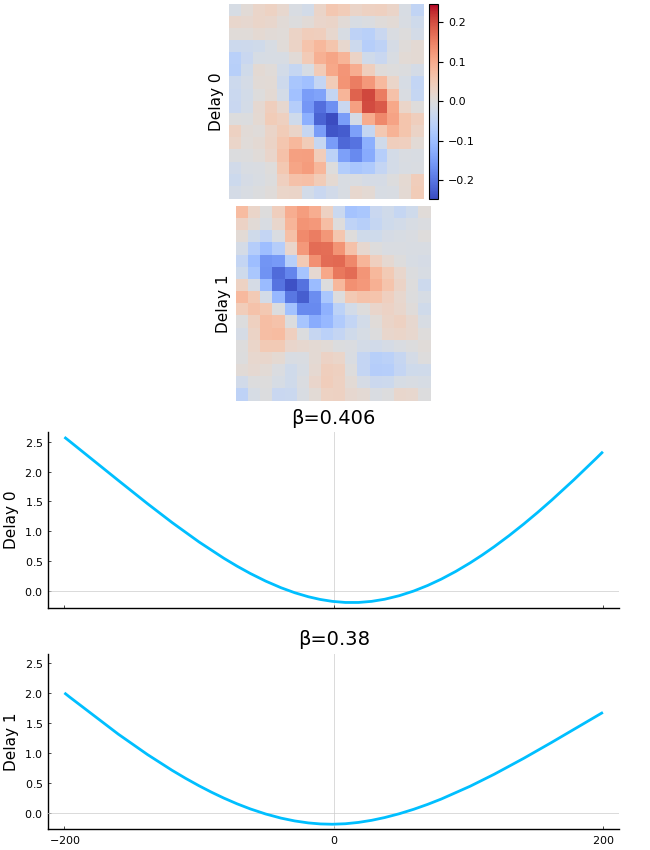

Drop Term: (temporal-1, spatial-1) with β: 0.37985945682875133.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.40609668579416847]
New βs: [0.43737476836456873]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 10607.132673879685, PenaltyLoss: 103.16601499307666.


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.055433261334806
                                 step is λ = 0
New Term 2th iteration. TermLoss: 10601.5664147836, PenaltyLoss: 106.46587328478635.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0980414080118845
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 3.948151733637036e-5.


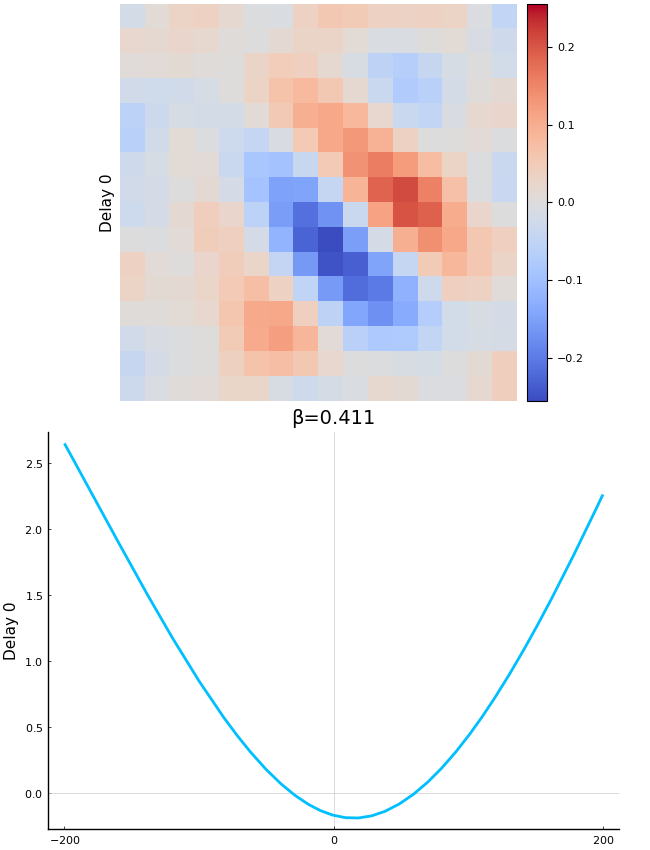

ePPR Models Cross Validation ...


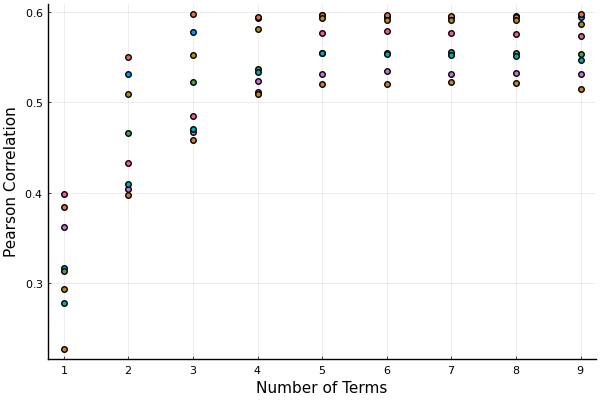

sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


5th model with 5 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model (Temporal-0, Spatial-1) New Term ...
Fit Model (Temporal-0, Spatial-2) New Term ...
Fit Model (Temporal-1, Spatial-1) New Term ...
Fit Model (Temporal-1, Spatial-2) New Term ...
Fit Model (Temporal-2, Spatial-1) New Term ...
Refit Model βs ...
Old βs: [0.4056154602584609, 0.23750303352531482, 0.35183557486317246, 0.2092814573705804, 0.23112073128950597]
New βs: [0.3632848522557019, 0.27426035512508656, 0.33113646412698944, 0.2365717104525928, 0.28073432253044994]
Cross Validated ePPR Done.


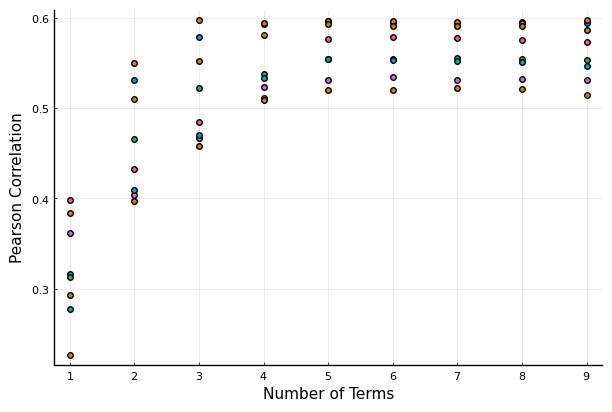

In [3]:
using ePPR
hp = ePPRHyperParams(imagesize...,nft=[3,3,3])
log = ePPRLog(debug=true,plot=true)
model,models = epprcv(x,y,hp,log);

### Final Model

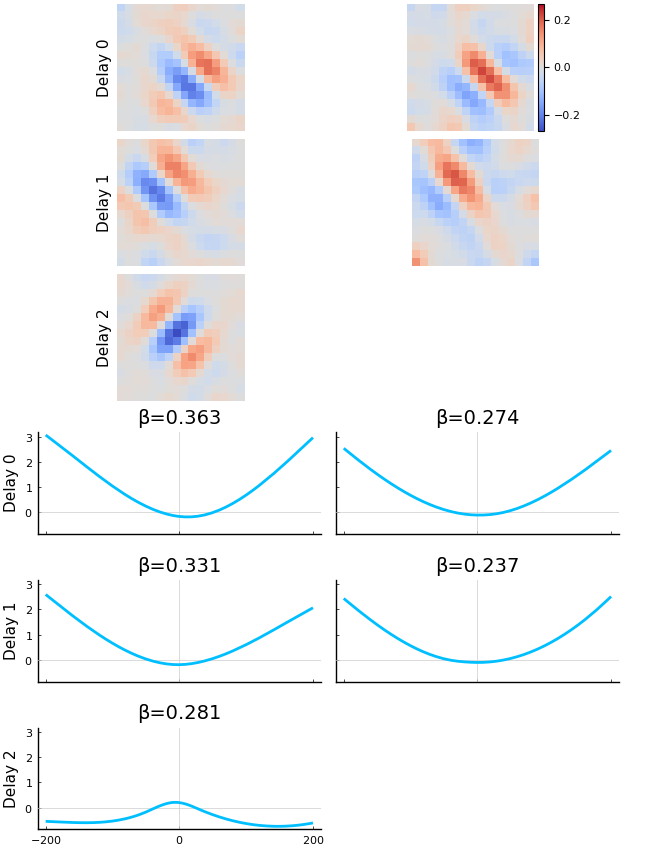

sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


In [4]:
plotmodel(model,hp)

## ePPR with Non-Linear Time Interaction

Cross Validation Data Partition: n = 24000, ntrain = 21120 in 5-fold, ntrainfold = 4224 in 8-fold, ntest = 2880 in 8-fold
Nonlinear Time Interaction, pool x[i-2:i, :] together ...
Choose 5th trainset.
ePPR Forward Stepwise ...
Fit (Temporal-0, Spatial-1) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 10752.08261295138, PenaltyLoss: 168.88930379908442.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.3287119256912858
                                 step is easy
New Term 2th iteration. TermLoss: 9719.02114306089, PenaltyLoss: 127.60534881652646.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.5492270542993516
                                 step is λ = 0
New Term 3th iteration. TermLoss: 8767.027318114098, PenaltyLoss: 183.55798650651073.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.4030832590524187
                                 step is λ = 0
New Term 4th iteration. Te

New Term 1th iteration. TermLoss: 6060.979627821825, PenaltyLoss: 217.0966929268546.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9904436834022289
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6006.668319803865, PenaltyLoss: 193.61039726645484.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9871634350400701
                                 step is λ = 0
New Term 3th iteration. TermLoss: 6007.751232232608, PenaltyLoss: 196.25899413092873.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9796334082164424
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0002473534800469167.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 6009.614547714937, PenaltyLoss: 173.02029212310927.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9941958197719523


                                 ρ = 0.7705948820056087
                                 step is easy
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00025366890852115465.
ePPR Backward Stepwise ...


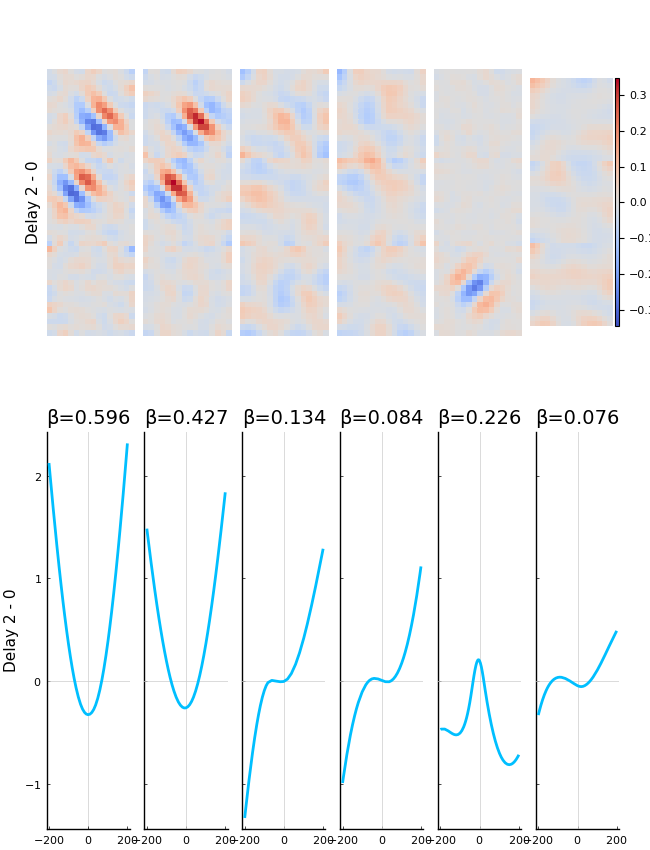

Drop Term: (temporal-0, spatial-6) with β: 0.07645041899851601.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.5955350573609848, 0.4271727824116664, 0.13425261560041965, 0.08433877742964654, 0.22644785592490801]
New βs: [0.6254191366150054, 0.44957385675689415, 0.16976290886301446, 0.09944408749311459, 0.2625462146461833]
Refit (Temporal-0, Spatial-1) New Term ...


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


New Term 1th iteration. TermLoss: 5846.858026020803, PenaltyLoss: 198.26508313473963.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9883125662170578
                                 step is λ = 0
New Term 2th iteration. TermLoss: 5840.638236309375, PenaltyLoss: 197.1128338789574.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9778870023143048
                                 step is λ = 0
New Term 3th iteration. TermLoss: 5842.76055491152, PenaltyLoss: 199.1504837103714.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9789772601216168
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00019287396578907478.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 5852.240727399988, PenaltyLoss: 176.65775353742671.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0431980197652444
 

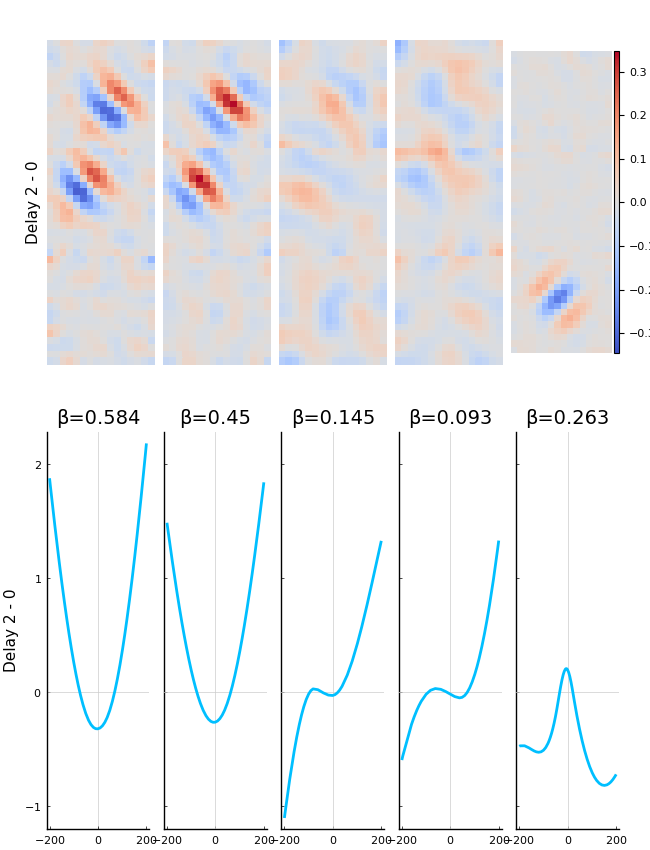

Drop Term: (temporal-0, spatial-4) with β: 0.09253228133724761.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.5838443496481821, 0.44957385675689415, 0.14477799366628694, 0.2625462146461833]
New βs: [0.6293500413094991, 0.45031793476636545, 0.16016710066375614, 0.2793855143204832]
Refit (Temporal-0, Spatial-1) New Term ...


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


New Term 1th iteration. TermLoss: 5887.231732285496, PenaltyLoss: 201.05310584632366.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0091258367877134
                                 step is λ = 0
New Term 2th iteration. TermLoss: 5879.597347935339, PenaltyLoss: 205.03227173999227.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.989463128905819
                                 step is λ = 0
New Term 3th iteration. TermLoss: 5881.97997210659, PenaltyLoss: 206.76205541924764.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9824712580214662
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0001718925544564247.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 5891.246114129106, PenaltyLoss: 176.65775353742671.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.988163506133963
  

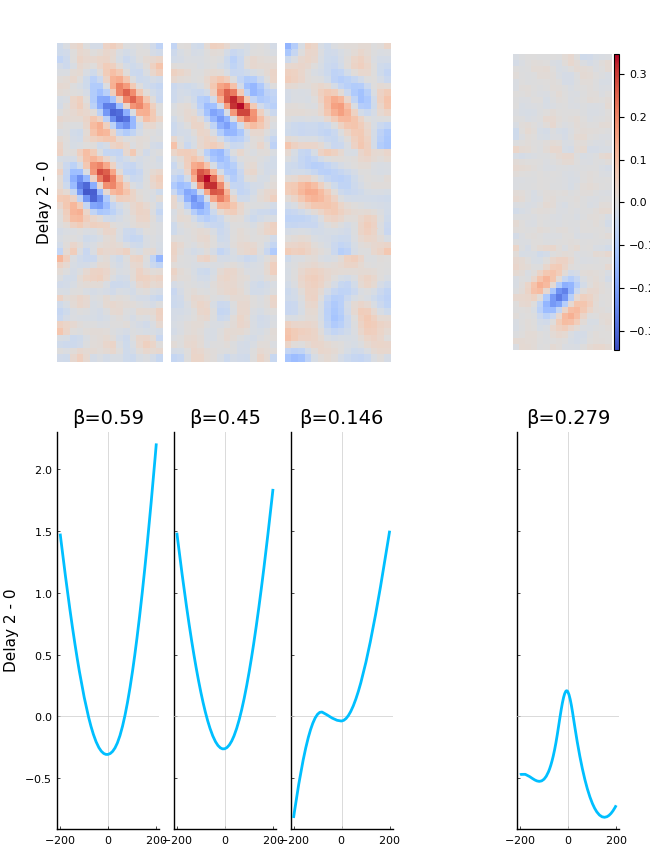

Drop Term: (temporal-0, spatial-3) with β: 0.14643142475687684.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.5902673087624766, 0.45031793476636545, 0.2793855143204832]
New βs: [0.585952494534692, 0.4594092407082961, 0.2901809936694099]
Refit (Temporal-0, Spatial-1) New Term ...


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


New Term 1th iteration. TermLoss: 6098.724643669978, PenaltyLoss: 208.6480895001416.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0025248159731024
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6067.465409362194, PenaltyLoss: 220.0348264655162.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0210626763356714
                                 step is λ = 0
New Term 3th iteration. TermLoss: 6067.584470665878, PenaltyLoss: 222.18823298593995.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.9877812891393524
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 8.398963864493461e-5.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 6077.706606163048, PenaltyLoss: 176.65775353742671.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9883054019299554
  

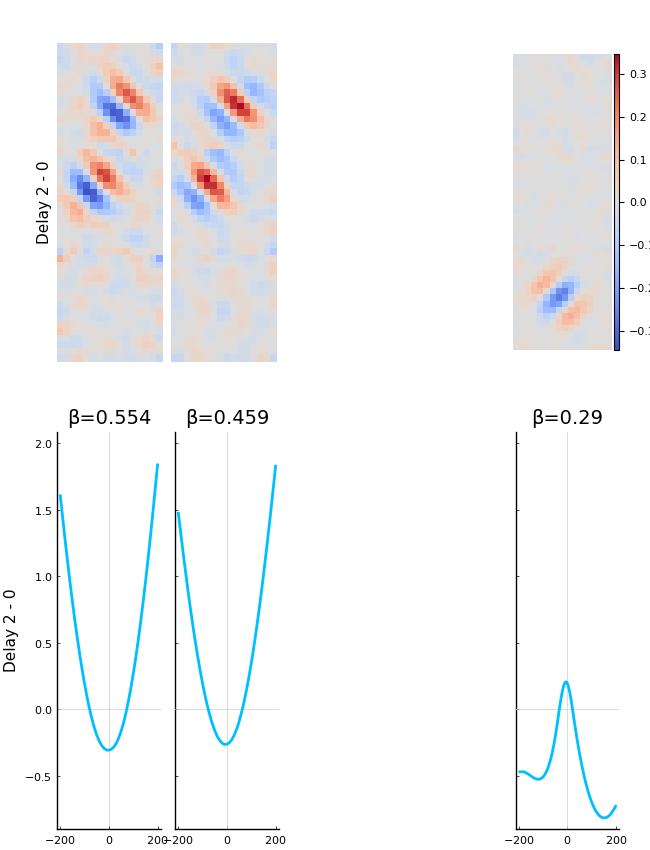

Drop Term: (temporal-0, spatial-5) with β: 0.2901809936694099.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.5538100474772462, 0.4594092407082961]
New βs: [0.6009963981515857, 0.45517108701449327]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 6779.745632899415, PenaltyLoss: 223.85506778715907.


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.8666405515802982
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6761.4033125349615, PenaltyLoss: 235.69917077928355.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.7138119651451729
                                 step is λ = 0
New Term 3th iteration. TermLoss: 6763.184218963687, PenaltyLoss: 236.71530901683403.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 0.8560098130138485
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 7.851188948559054e-5.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 6770.627537002554, PenaltyLoss: 176.65775353742671.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.8911106580234197
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6754

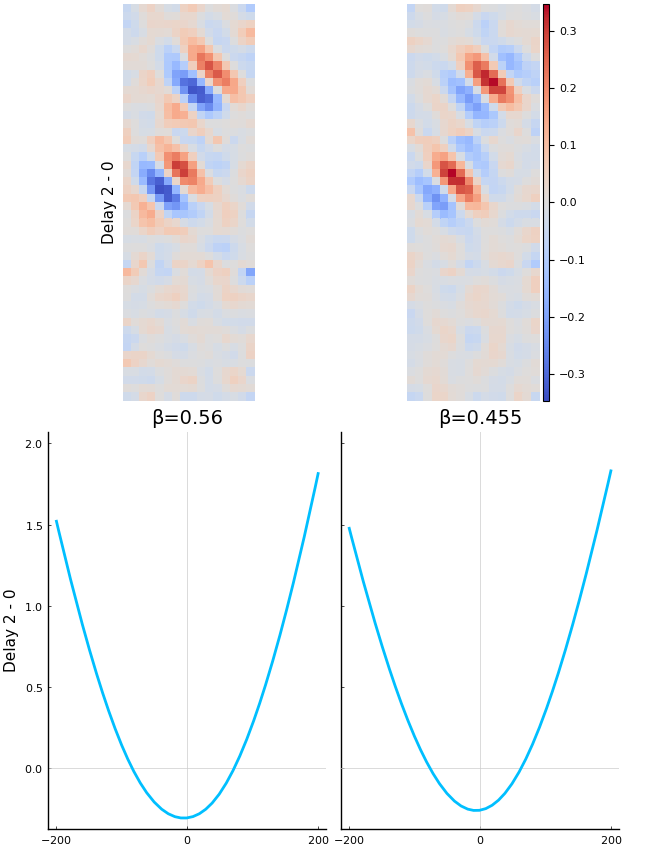

Drop Term: (temporal-0, spatial-2) with β: 0.45517108701449327.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.5602707270937042]
New βs: [0.6669137429398343]
Refit (Temporal-0, Spatial-1) New Term ...


sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


New Term 1th iteration. TermLoss: 8488.744813137735, PenaltyLoss: 238.180760588419.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0751233053629516
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8415.789937526148, PenaltyLoss: 246.17217661984574.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.1440213495490914
                                 step is λ = 0
New Term 3th iteration. TermLoss: 8417.385085343278, PenaltyLoss: 246.8513781003144.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.0761768688722961
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00013564601885055483.


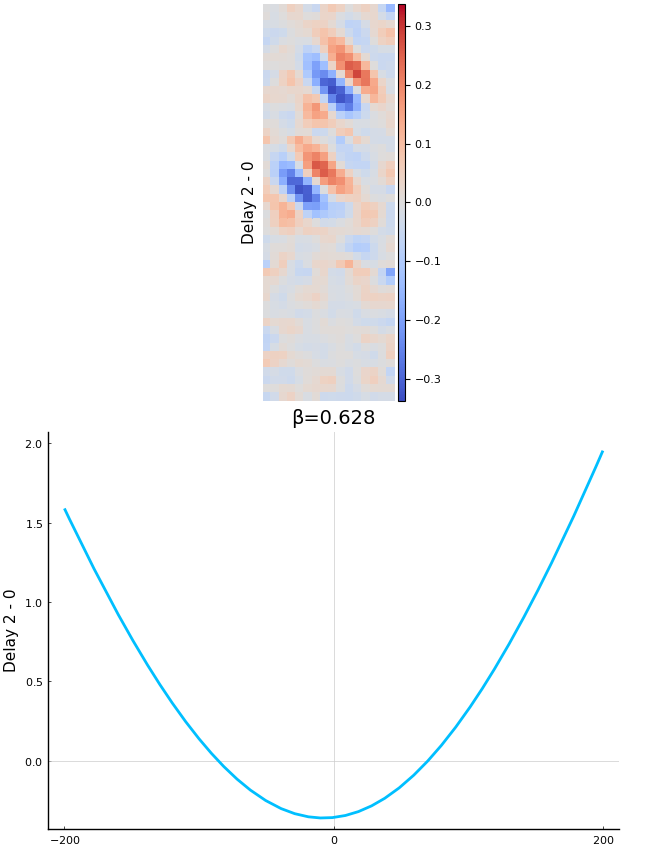

ePPR Models Cross Validation ...


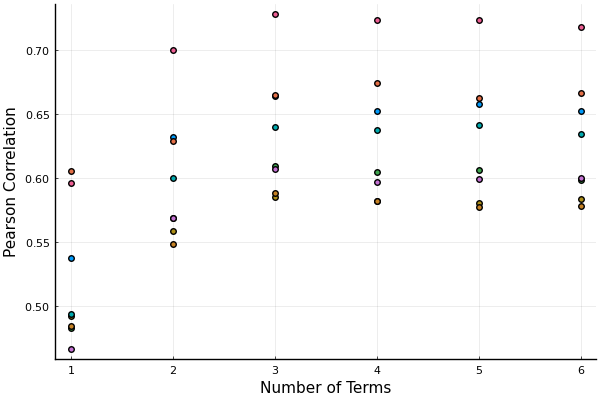

sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


3th model with 3 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model (Temporal-0, Spatial-1) New Term ...
Fit Model (Temporal-0, Spatial-2) New Term ...
Fit Model (Temporal-0, Spatial-3) New Term ...
Refit Model βs ...
Old βs: [0.620530760749377, 0.4172250726514369, 0.23763478067346674]
New βs: [0.5943389611602568, 0.456783833707143, 0.28843502274831523]
Cross Validated ePPR Done.


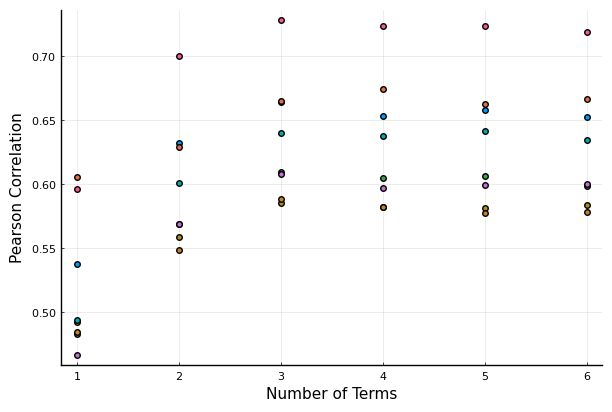

In [5]:
using ePPR
hp=ePPRHyperParams(imagesize...,ndelay=3,lambda=15,nft=[6])
log = ePPRLog(debug=true,plot=true)
model,models = epprcv(x,y,hp,log);

### Final Model

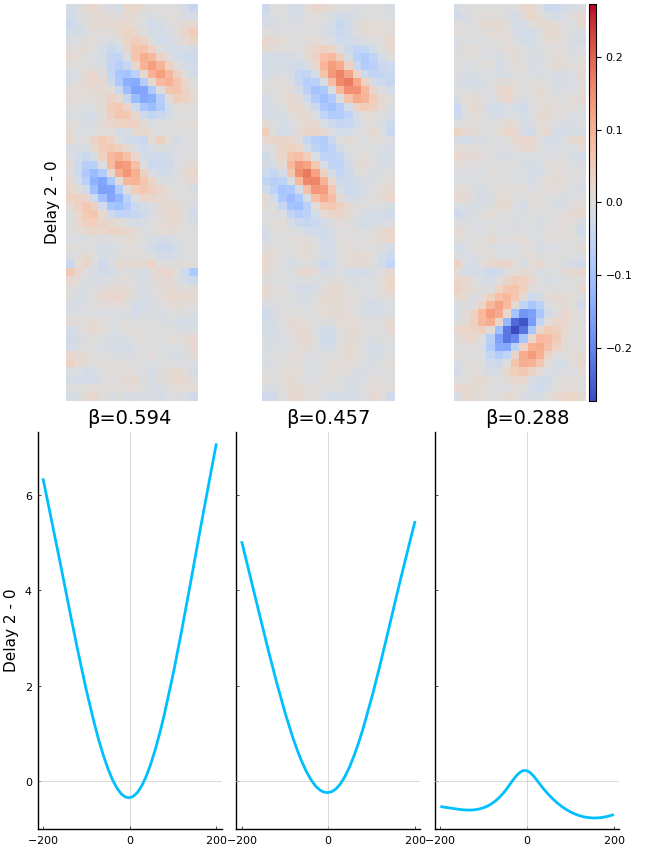

sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


In [6]:
plotmodel(model,hp)

## Data Recorded from an Anesthetized Cat
#### x: Natural Images each present 40ms
#### y1: Neuron-1 Spike Sum
#### y2: Neuron-2 Spike Sum

In [7]:
using FileIO
data=load(joinpath(@__DIR__,"data.jld2"));x=data["x"];y1=data["y1"];y2=data["y2"];imagesize=data["imagesize"];

In [11]:
using Interact,Images
i = slider(1:size(x,1))
xvalue = map(j->colorview(Gray,reshape(x[j,:]/255,imagesize...)),i)
y1value = map(j->y1[j],i)
y2value = map(j->y2[j],i)
vbox(i,xvalue,y1value,y2value)

(div { style=Dict("display" => "flex","flex-direction" => "column") }
  Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 24000,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 4 listeners. Value:
12000, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\fff00\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\fff00\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\fff00\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\fff00\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\fff00\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000409fc8b0, Task (runnable) @0x00000000409fc8b0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\

## ePPR with Linear Time Interaction

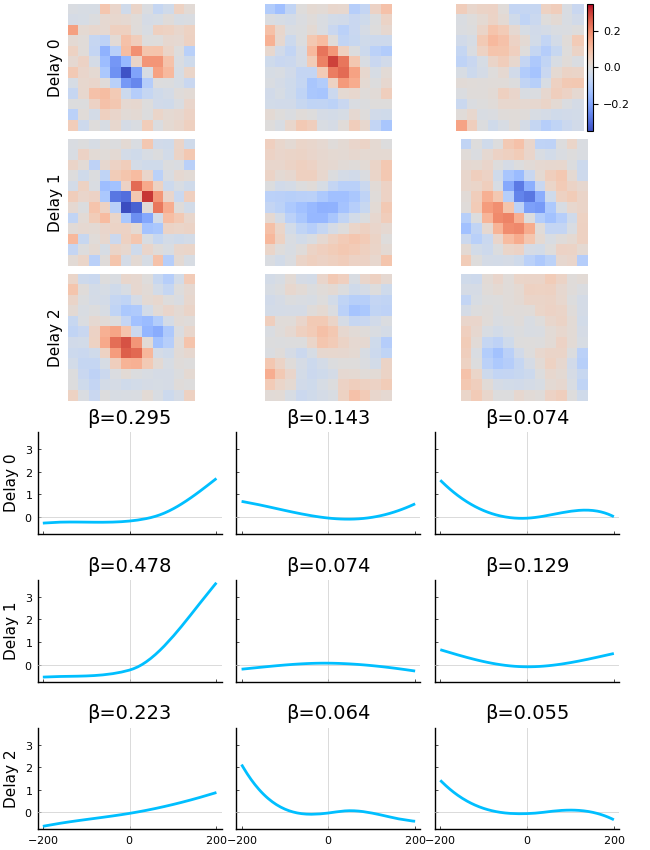

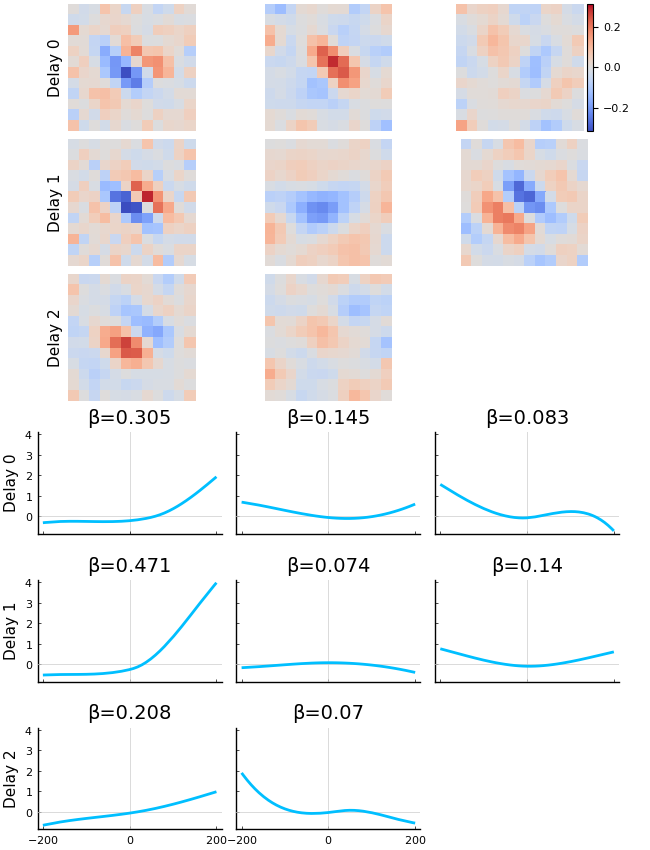

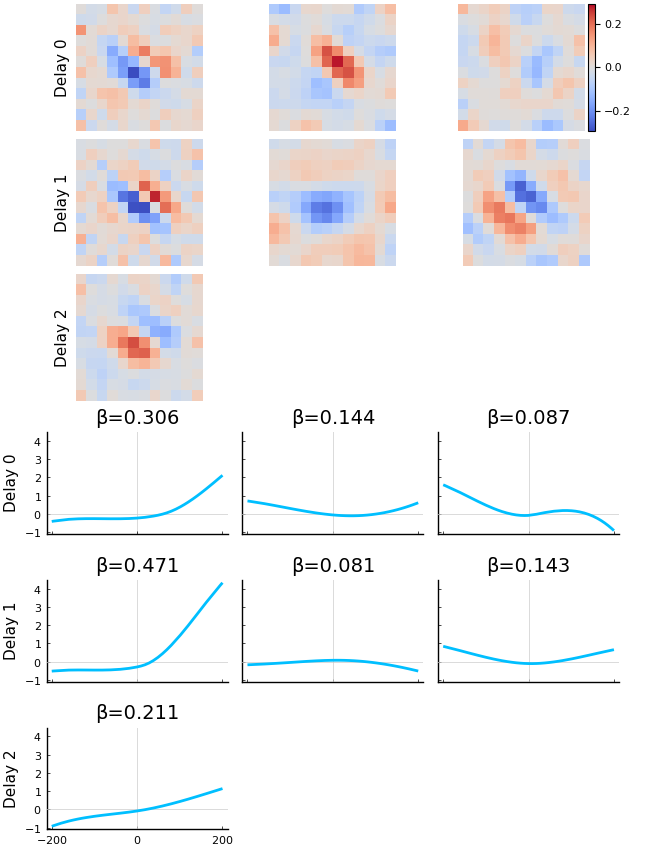

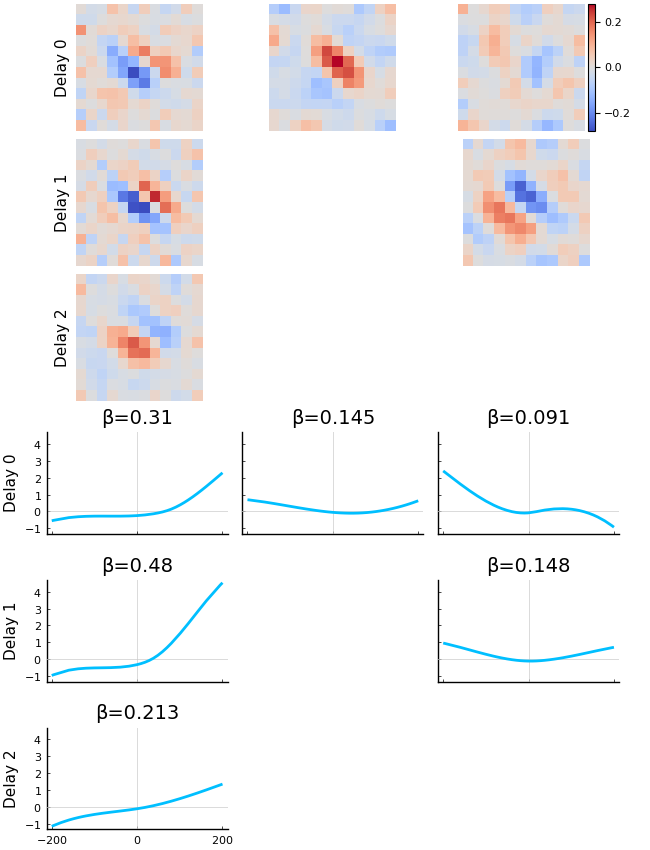

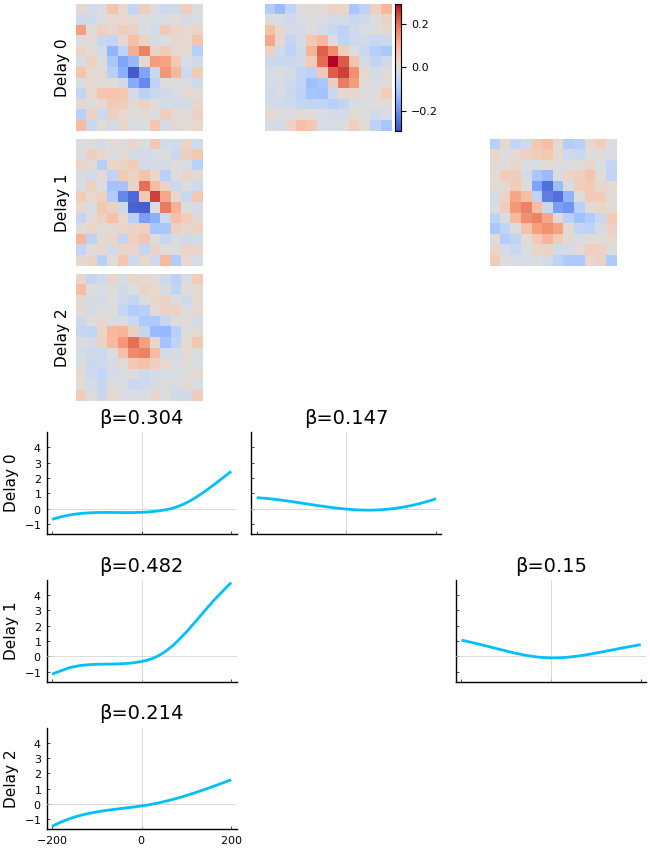

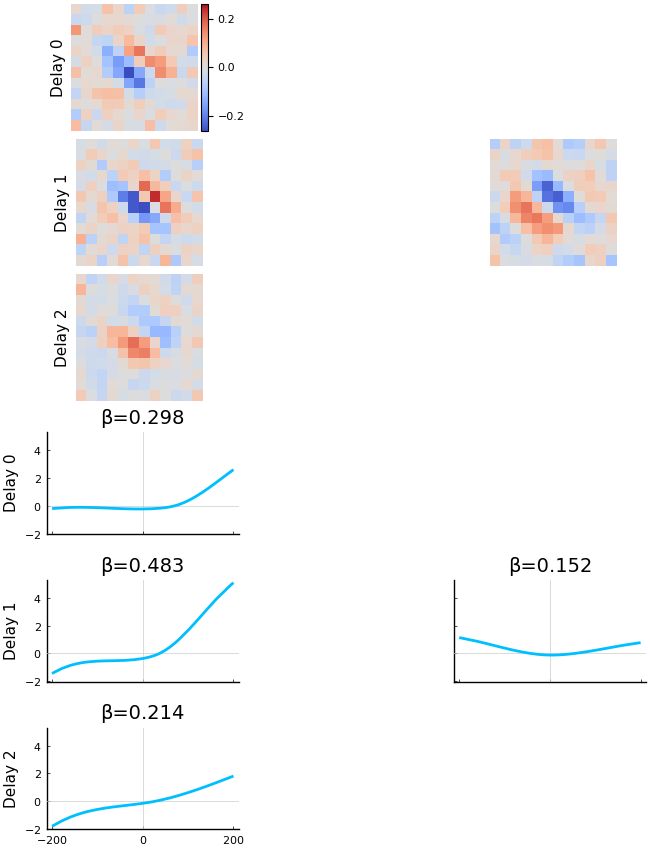

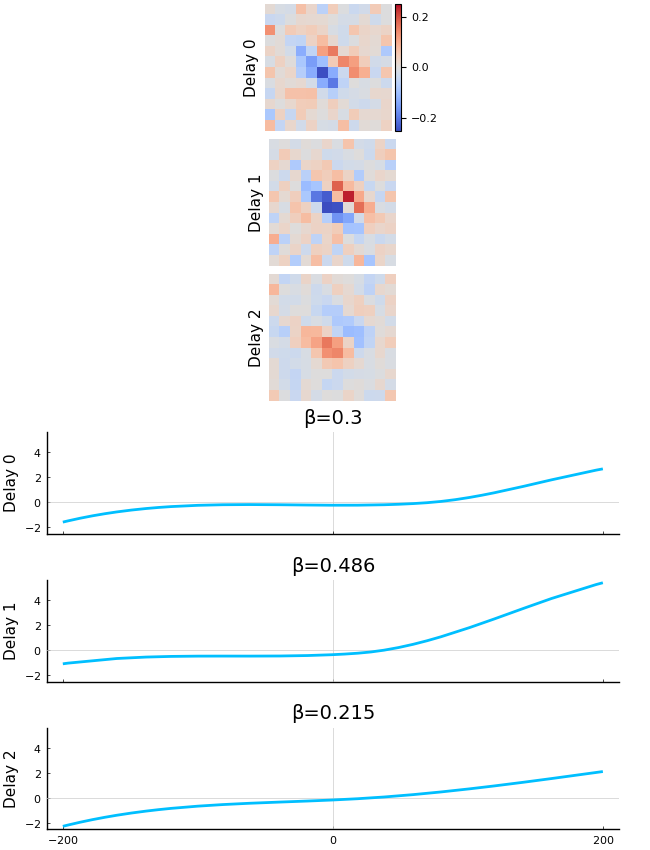

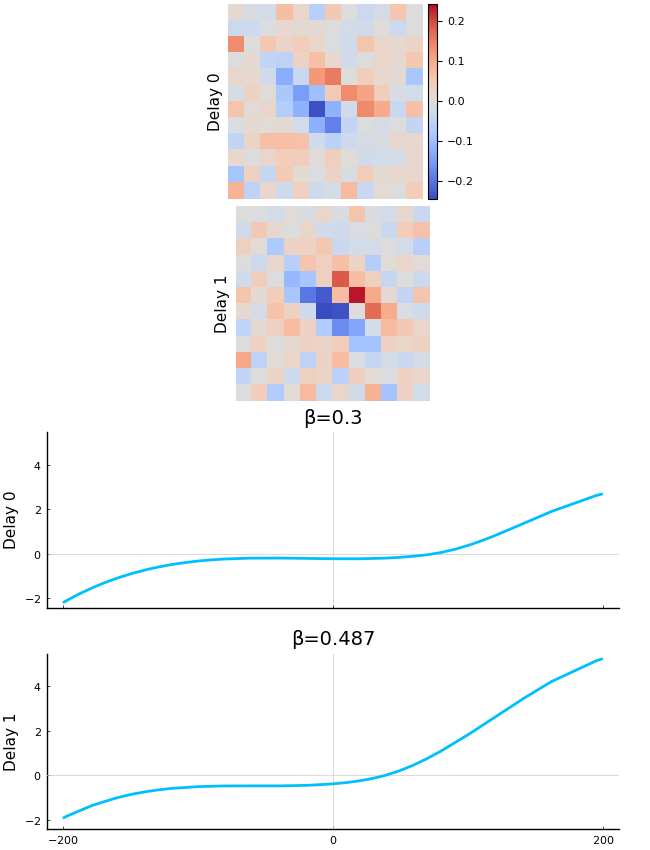

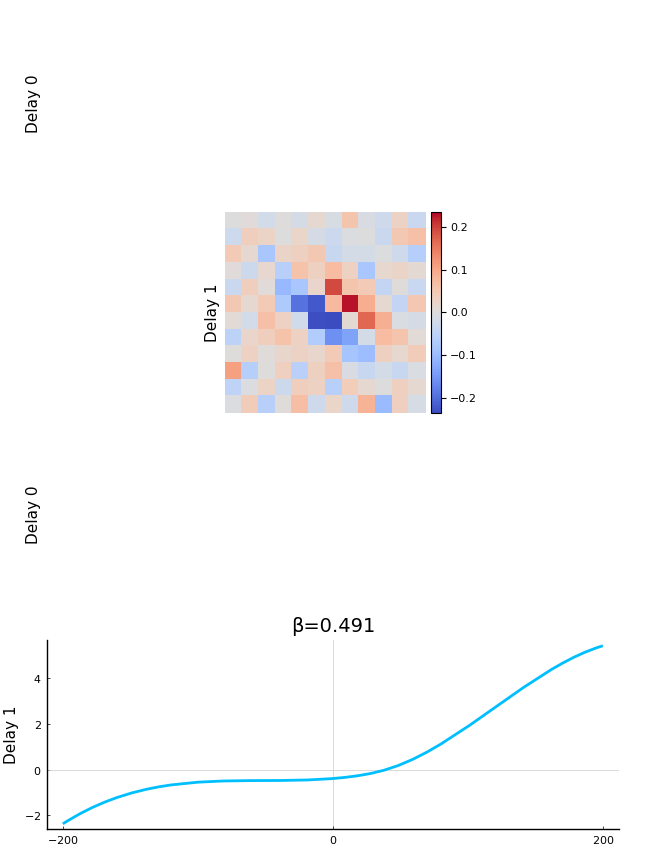

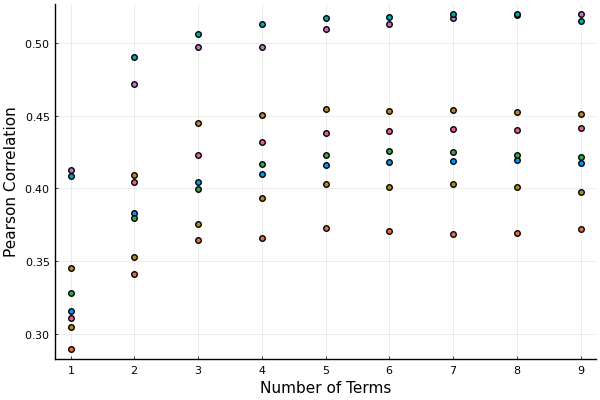

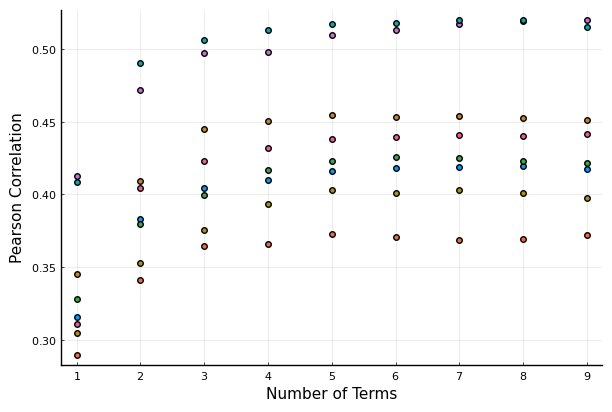

sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parame

In [12]:
using ePPR
hp=ePPRHyperParams(imagesize...,lambda=7)
log = ePPRLog(plot=true)
model,models = epprcv(x,y1,hp,log);

### Final Model

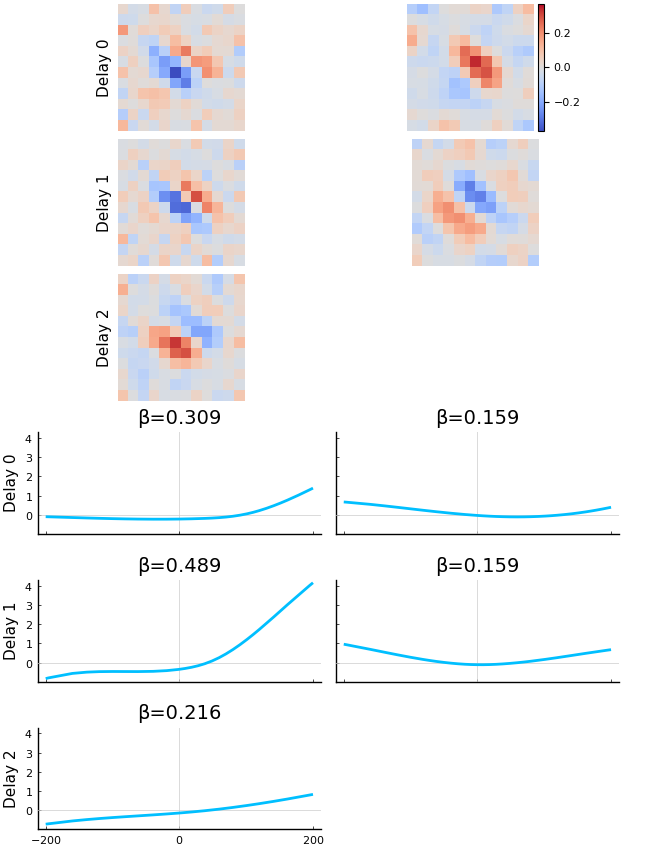

sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


In [13]:
plotmodel(model,hp)

## ePPR with Non-Linear Time Interaction

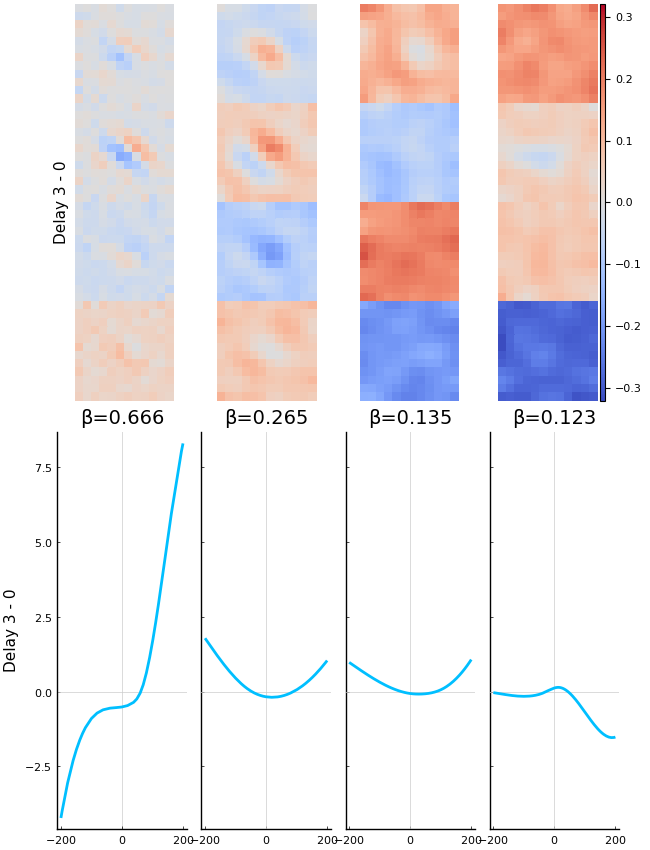

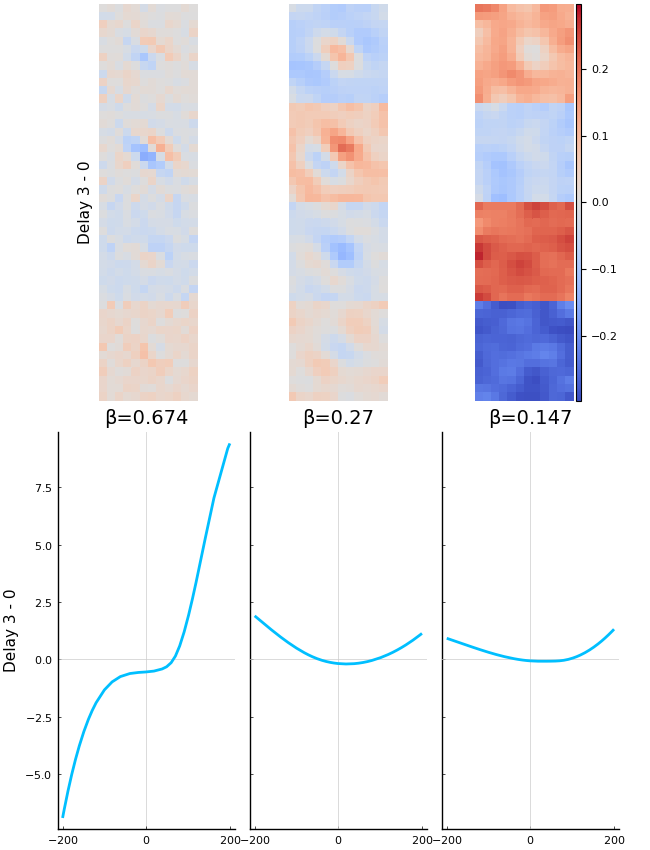

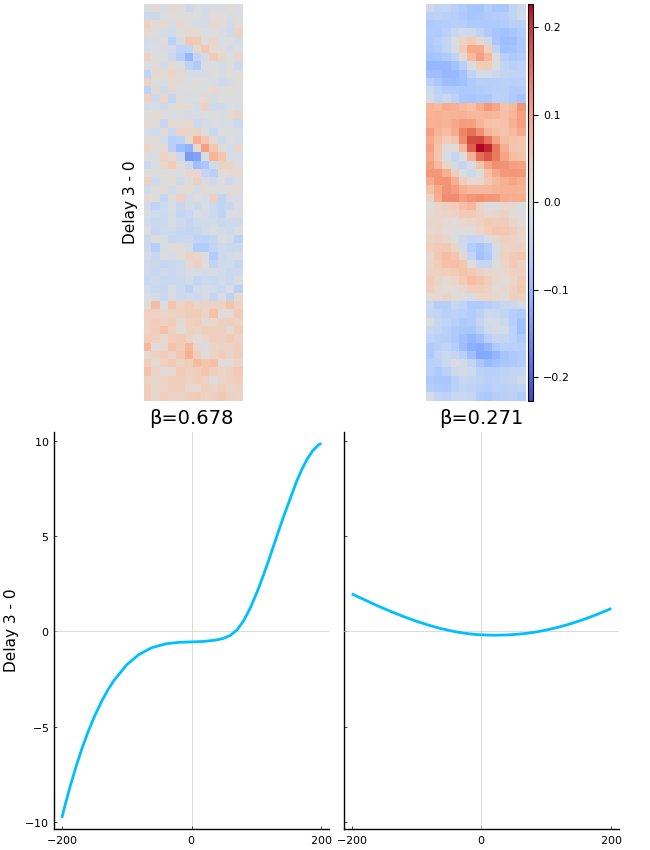

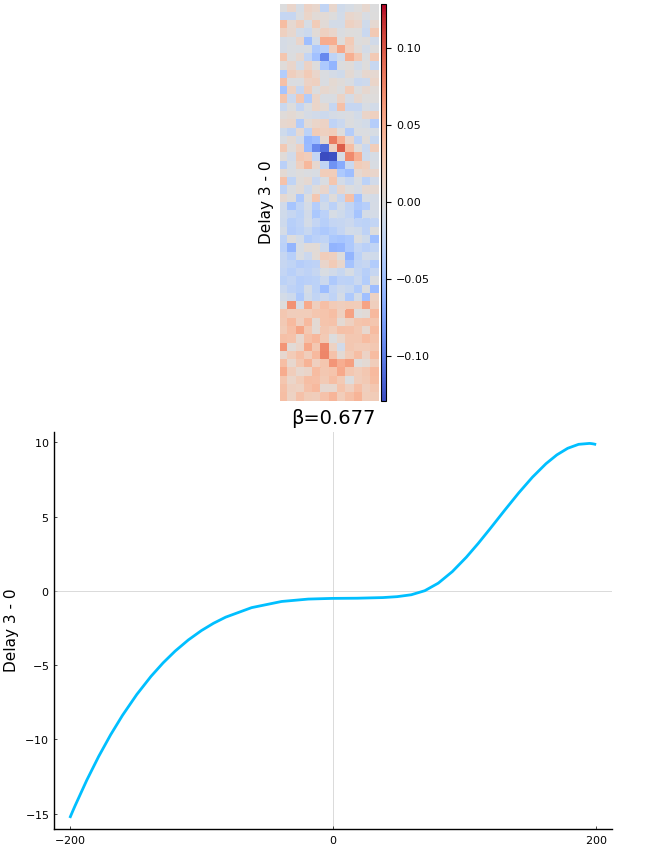

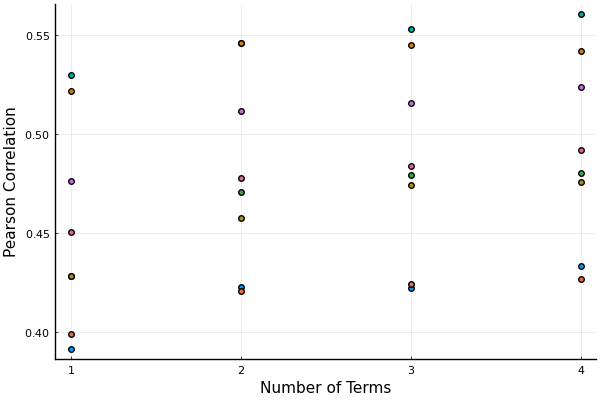

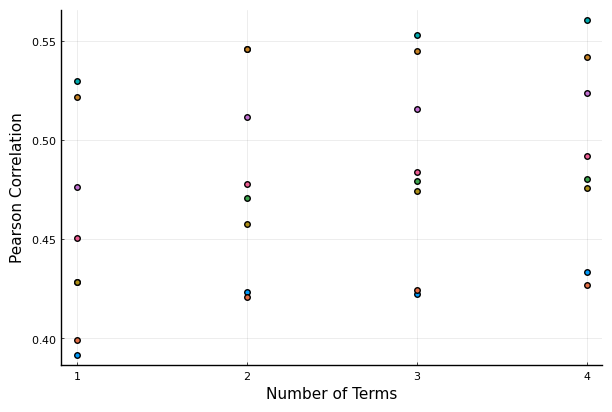

sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parame

In [14]:
using ePPR
hp=ePPRHyperParams(imagesize...,ndelay=4,lambda=45,nft=[4])
log = ePPRLog(plot=true)
model,models = epprcv(x,y1,hp,log);

### Final Model

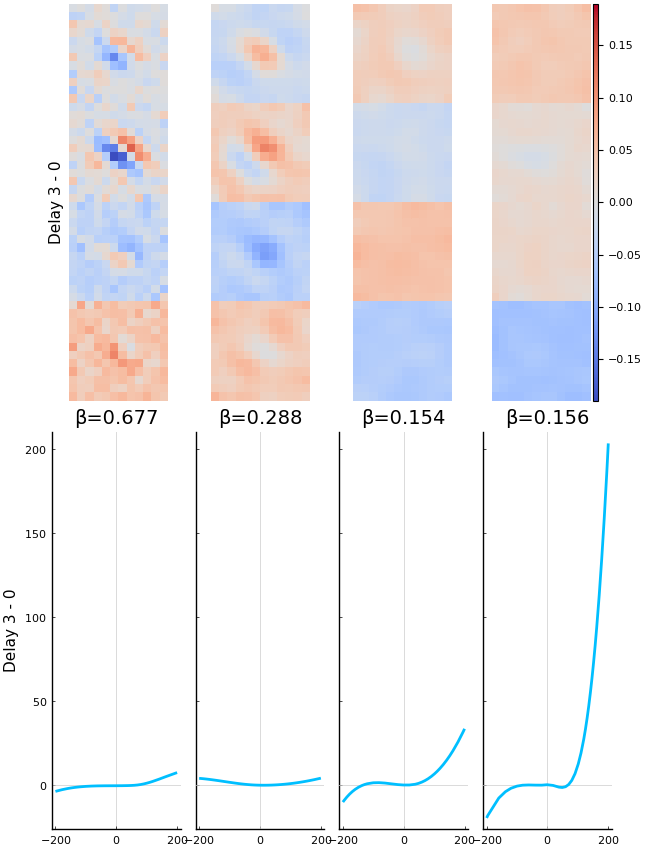

sys:1: MatplotlibDeprecationWarning: Passing the fontdict parameter of _set_ticklabels() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


In [16]:
plotmodel(model,hp)

# Benchmark

In [ ]:
using BenchmarkTools
@btime model,models = epprcv(x,y,hp);